In [2]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [3]:
# all modules necessary for this nb
import os
import sys
import pickle
import matplotlib

import numpy as np
np.random.seed(0)
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [4]:
pl.style.use('fabiostyle')
# pl.rcParams['savefig.dpi'] = 300 # dpi for most publications
# pl.rcParams['xtick.labelsize'] = 7
# pl.rcParams['ytick.labelsize'] = 7
# pl.rcParams['axes.labelsize'] = 7
# pl.rcParams['axes.titlesize'] = 5
# pl.rcParams['legend.fontsize'] = 5
# pl.rcParams['xtick.labelsize'] = 5
# pl.rcParams['ytick.labelsize'] = 5
# pl.rcParams['font.size'] = 7

# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [5]:
NOTEBOOK_NAME = 'decoding_matrix_combined'

In [8]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'heatmap', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'add_significance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'annotate_heatmap', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'annotate_vector_heatmap', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'annotate_vector_heatmap2', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'sig_vs_chance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'vector_heatmap', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [7]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [40]:
#import vHPC decoding scores
within_vhpc_scores_CS = ut.load_variable('scores_CS', 'autorestore/decoding_combined_vhpc/')
within_vhpc_scores_tr = ut.load_variable('scores_tr', 'autorestore/decoding_combined_vhpc/')
within_vhpc_scores_CS_1s = ut.load_variable('scores_CS', 'autorestore/decoding_combined_vhpc_1sec/')
within_vhpc_scores_tr_1s = ut.load_variable('scores_tr', 'autorestore/decoding_combined_vhpc_1sec/')

#scores using global min of n cells
within_vhpc_scores_CS_gmin = ut.load_variable('scores_CS_gmin', 'autorestore/decoding_combined_vhpc/')
within_vhpc_scores_tr_gmin = ut.load_variable('scores_tr_gmin', 'autorestore/decoding_combined_vhpc/')
within_vhpc_scores_CS_gmin_1s = ut.load_variable('scores_CS_gmin', 'autorestore/decoding_combined_vhpc_1sec/')
within_vhpc_scores_tr_gmin_1s = ut.load_variable('scores_tr_gmin', 'autorestore/decoding_combined_vhpc_1sec/')

#scores using n cells of 200 (or total cells if < 200 available)
within_vhpc_scores_CS_200 = ut.load_variable('scores_CS_200', 'autorestore/decoding_combined_vhpc/')
within_vhpc_scores_tr_200 = ut.load_variable('scores_tr_200', 'autorestore/decoding_combined_vhpc/')
within_vhpc_scores_CS_200_1s = ut.load_variable('scores_CS_200', 'autorestore/decoding_combined_vhpc_1sec/')
within_vhpc_scores_tr_200_1s = ut.load_variable('scores_tr_200', 'autorestore/decoding_combined_vhpc_1sec/')

#import dHPC decoding scores
within_dhpc_scores_CS = ut.load_variable('scores_CS', 'autorestore/decoding_combined_dhpc/')
within_dhpc_scores_tr = ut.load_variable('scores_tr', 'autorestore/decoding_combined_dhpc/')
within_dhpc_scores_CS_1s = ut.load_variable('scores_CS', 'autorestore/decoding_combined_dhpc_1sec/')
within_dhpc_scores_tr_1s = ut.load_variable('scores_tr', 'autorestore/decoding_combined_dhpc_1sec/')

#scores using global min of n cells
within_dhpc_scores_CS_gmin = ut.load_variable('scores_CS_gmin', 'autorestore/decoding_combined_dhpc/')
within_dhpc_scores_tr_gmin = ut.load_variable('scores_tr_gmin', 'autorestore/decoding_combined_dhpc/')
within_dhpc_scores_CS_gmin_1s = ut.load_variable('scores_CS_gmin', 'autorestore/decoding_combined_dhpc_1sec/')
within_dhpc_scores_tr_gmin_1s = ut.load_variable('scores_tr_gmin', 'autorestore/decoding_combined_dhpc_1sec/')

#scores using n cells of 200 (or total cells if < 200 available)
within_dhpc_scores_CS_200 = ut.load_variable('scores_CS_200', 'autorestore/decoding_combined_dhpc/')
within_dhpc_scores_tr_200 = ut.load_variable('scores_tr_200', 'autorestore/decoding_combined_dhpc/')
within_dhpc_scores_CS_200_1s = ut.load_variable('scores_CS_200', 'autorestore/decoding_combined_dhpc_1sec/')
within_dhpc_scores_tr_200_1s = ut.load_variable('scores_tr_200', 'autorestore/decoding_combined_dhpc_1sec/')

In [41]:
#import vHPC decoding scores
across_vhpc_scores_CS = ut.load_variable('scores_CS', 'autorestore/decoding_across_session_combined_vhpc/')
across_vhpc_scores_tr = ut.load_variable('scores_tr', 'autorestore/decoding_across_session_combined_vhpc/')
across_vhpc_scores_CS_1s = ut.load_variable('scores_CS', 'autorestore/decoding_across_session_combined_vhpc_1sec/')
across_vhpc_scores_tr_1s = ut.load_variable('scores_tr', 'autorestore/decoding_across_session_combined_vhpc_1sec/')
across_vhpc_scores_CS_gmin = ut.load_variable('scores_CS_gmin', 'autorestore/decoding_across_session_combined_vhpc/')
across_vhpc_scores_tr_gmin = ut.load_variable('scores_tr_gmin', 'autorestore/decoding_across_session_combined_vhpc/')
across_vhpc_scores_CS_gmin_1s = ut.load_variable('scores_CS_gmin', 'autorestore/decoding_across_session_combined_vhpc_1sec/')
across_vhpc_scores_tr_gmin_1s = ut.load_variable('scores_tr_gmin', 'autorestore/decoding_across_session_combined_vhpc_1sec/')
across_vhpc_scores_CS_200 = ut.load_variable('scores_CS_200', 'autorestore/decoding_across_session_combined_vhpc/')
across_vhpc_scores_tr_200 = ut.load_variable('scores_tr_200', 'autorestore/decoding_across_session_combined_vhpc/')
across_vhpc_scores_CS_200_1s = ut.load_variable('scores_CS_200', 'autorestore/decoding_across_session_combined_vhpc_1sec/')
across_vhpc_scores_tr_200_1s = ut.load_variable('scores_tr_200', 'autorestore/decoding_across_session_combined_vhpc_1sec/')

across_dhpc_scores_CS = ut.load_variable('scores_CS', 'autorestore/decoding_across_session_combined_dhpc/')
across_dhpc_scores_tr = ut.load_variable('scores_tr', 'autorestore/decoding_across_session_combined_dhpc/')
across_dhpc_scores_CS_1s = ut.load_variable('scores_CS', 'autorestore/decoding_across_session_combined_dhpc_1sec/')
across_dhpc_scores_tr_1s = ut.load_variable('scores_tr', 'autorestore/decoding_across_session_combined_dhpc_1sec/')
across_dhpc_scores_CS_gmin = ut.load_variable('scores_CS_gmin', 'autorestore/decoding_across_session_combined_dhpc/')
across_dhpc_scores_tr_gmin = ut.load_variable('scores_tr_gmin', 'autorestore/decoding_across_session_combined_dhpc/')
across_dhpc_scores_CS_gmin_1s = ut.load_variable('scores_CS_gmin', 'autorestore/decoding_across_session_combined_dhpc_1sec/')
across_dhpc_scores_tr_gmin_1s = ut.load_variable('scores_tr_gmin', 'autorestore/decoding_across_session_combined_dhpc_1sec/')
across_dhpc_scores_CS_200 = ut.load_variable('scores_CS_200', 'autorestore/decoding_across_session_combined_dhpc/')
across_dhpc_scores_tr_200 = ut.load_variable('scores_tr_200', 'autorestore/decoding_across_session_combined_dhpc/')
across_dhpc_scores_CS_200_1s = ut.load_variable('scores_CS_200', 'autorestore/decoding_across_session_combined_dhpc_1sec/')
across_dhpc_scores_tr_200_1s = ut.load_variable('scores_tr_200', 'autorestore/decoding_across_session_combined_dhpc_1sec/')

In [42]:
within_dhpc_scores_CS_1s.keys()

['pre', 'ext2', 'ext1', 'renew', 'post', 'd2']

In [43]:
within_sessions = 'pre','d2','post','ext1','ext2','renew'
across_sessions ='pred2','d2post','d2ext1','d2ext2','d2renew', 'ext1renew', 'prerenew', 'postext1', 'postext2', 'prepost', 'ext1ext2', 'postrenew','preext2','preext1','ext2renew'

In [44]:
#mmc = multiple-comparisons correction (using bonferroni), where mcc = number of comparisons))

from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [45]:
def sig_vs_chance(ax, array1, chance, x1, y1, loops=15, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),colors='k'):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    ax.text(x1, y1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=4, color=colors)
    return sig_value, p

/home/fabios/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


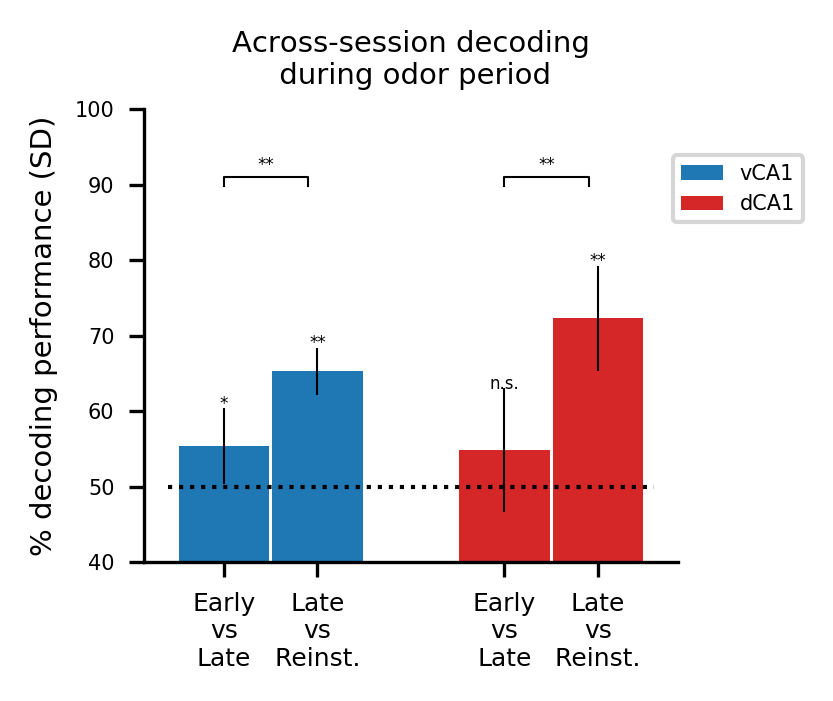

In [46]:
import random
from matplotlib.patches import Patch

loops = 10
fig, ax = pl.subplots(1,1, figsize=(2.3, 2), sharey=True)
for i,comp in zip(range(2),['prepost','postrenew']):
        ax.bar(i,np.mean(across_vhpc_scores_CS_gmin_1s[comp][:loops])*100, width=.97,yerr=np.std(across_vhpc_scores_CS_gmin_1s[comp][:loops])*100,
             color='tab:blue')
        ax.bar(i+3,np.mean(across_dhpc_scores_CS_gmin_1s[comp][:loops])*100, width=.97,yerr=np.std(across_dhpc_scores_CS_gmin_1s[comp][:loops])*100,
             color='tab:red')
ax.set_xticks([0,1,3,4])
ax.set_xticklabels(['Early\nvs\nLate','Late\nvs\nReinst.','Early\nvs\nLate','Late\nvs\nReinst.'],fontsize=6)
ax.set_ylim(40,100)
ax.set_title("Across-session decoding\n during odor period")
ax.hlines(50, -0.6,4.6, color='k', lw=1, linestyles='dotted')
ax.set_ylabel("% decoding performance (SD)")
ax.legend([Patch(facecolor='tab:blue'),Patch(facecolor='tab:red')],['vCA1','dCA1'],loc=(.99,.75),frameon=True)


pvs=[]
compar = ['prepost','postrenew']
for i in range(1):
    pvs.append(add_significance(ax, across_vhpc_scores_CS_gmin_1s[compar[i]][:loops],
                across_vhpc_scores_CS_gmin_1s[compar[i+1]][:loops],i,i+.9,91,mcc=2))
    pvs.append(add_significance(ax, across_dhpc_scores_CS_gmin_1s[compar[i]][:loops],
                across_dhpc_scores_CS_gmin_1s[compar[i+1]][:loops],i+3,i+3.9,91,mcc=2))

for comp,i in zip(compar, range(len(compar))):
    for r,reg in zip(range(2),['vhpc','dhpc']):
        pvs.append(sig_vs_chance(ax,eval("across_%s_scores_CS_gmin_1s[comp][:loops]"%(reg))[:15],.5,i+(3*r),
               np.mean(eval("across_%s_scores_CS_gmin_1s[comp][:loops]"%(reg)))*100+(np.std(eval("across_%s_scores_CS_gmin_1s[comp][:loops]"%(reg)))*100),
                        loops=loops,sig_func=None,colors='k'))

fig.savefig('../final-ish figures/%s_Xsession_odor_decoding_VandD.pdf'%NOTEBOOK_NAME)

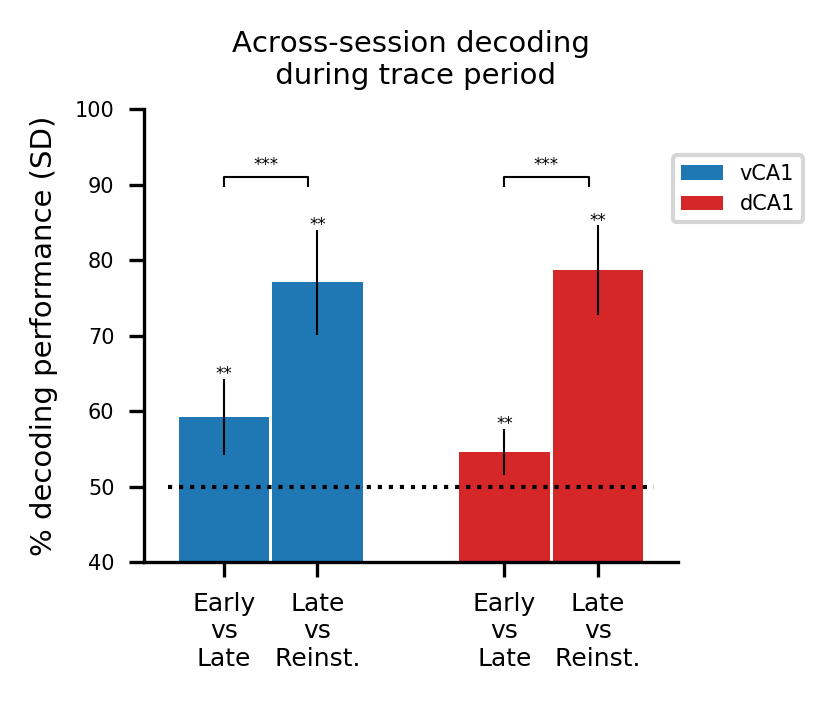

In [47]:
import random
from matplotlib.patches import Patch

loops = 10
fig, ax = pl.subplots(1,1, figsize=(2.3, 2), sharey=True)
for i,comp in zip(range(2),['prepost','postrenew']):
        ax.bar(i,np.mean(across_vhpc_scores_tr_gmin_1s[comp][:loops])*100, width=.97,yerr=np.std(across_vhpc_scores_tr_gmin_1s[comp][:loops])*100,
             color='tab:blue')
        ax.bar(i+3,np.mean(across_dhpc_scores_tr_gmin_1s[comp][:loops])*100, width=.97,yerr=np.std(across_dhpc_scores_tr_gmin_1s[comp][:loops])*100,
             color='tab:red')
ax.set_xticks([0,1,3,4])
ax.set_xticklabels(['Early\nvs\nLate','Late\nvs\nReinst.','Early\nvs\nLate','Late\nvs\nReinst.'],fontsize=6)
ax.set_ylim(40,100)
ax.set_title("Across-session decoding\n during trace period")
ax.hlines(50, -0.6,4.6, color='k', lw=1, linestyles='dotted')
ax.set_ylabel("% decoding performance (SD)")
ax.legend([Patch(facecolor='tab:blue'),Patch(facecolor='tab:red')],['vCA1','dCA1'],loc=(.99,.75),frameon=True)


pvs=[]
compar = ['prepost','postrenew']
for i in range(1):
    pvs.append(add_significance(ax, across_vhpc_scores_tr_gmin_1s[compar[i]][:loops],
                across_vhpc_scores_tr_gmin_1s[compar[i+1]][:loops],i,i+.9,91,mcc=2))
    pvs.append(add_significance(ax, across_dhpc_scores_tr_gmin_1s[compar[i]][:loops],
                across_dhpc_scores_tr_gmin_1s[compar[i+1]][:loops],i+3,i+3.9,91,mcc=2))

for comp,i in zip(compar, range(len(compar))):
    for r,reg in zip(range(2),['vhpc','dhpc']):
        pvs.append(sig_vs_chance(ax,eval("across_%s_scores_tr_gmin_1s[comp][:loops]"%(reg))[:15],.5,i+(3*r),
               np.mean(eval("across_%s_scores_tr_gmin_1s[comp][:loops]"%(reg)))*100+(np.std(eval("across_%s_scores_tr_gmin_1s[comp][:loops]"%(reg)))*100),
                        loops=loops,sig_func=None,colors='k'))

fig.savefig('../final-ish figures/%s_Xsession_trace_decoding_VandD.pdf'%NOTEBOOK_NAME)

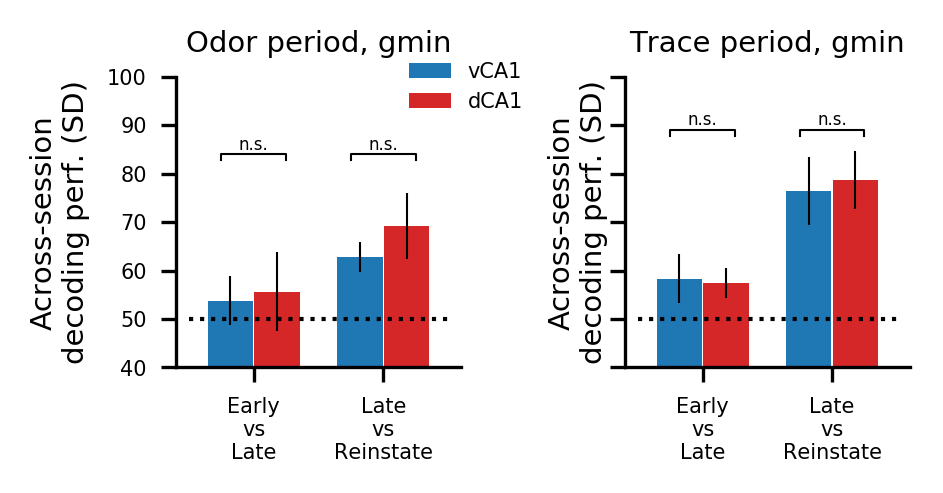

In [48]:
loops = 10
fig, ax = pl.subplots(1,2, figsize=(3.5, 2), sharey=True)
for i,comp in zip(range(2),['prepost','postrenew']):
    ax[0].bar(i-.18,np.mean(across_vhpc_scores_CS_gmin_1s[comp])*100, width=.35,yerr=np.std(across_vhpc_scores_CS_gmin_1s[comp][:loops])*100,
             color='tab:blue')
    ax[0].bar(i+.18,across_dhpc_scores_CS_gmin_1s[comp].mean()*100, width=.35,yerr=np.std(across_dhpc_scores_CS_gmin_1s[comp][:loops])*100,
             color='tab:red')
    ax[1].bar(i-.18,np.mean(across_vhpc_scores_tr_gmin_1s[comp])*100, width=.35,yerr=np.std(across_vhpc_scores_tr_gmin_1s[comp][:loops])*100,
             color='tab:blue')
    ax[1].bar(i+.18,across_dhpc_scores_tr_gmin_1s[comp].mean()*100, width=.35,yerr=np.std(across_dhpc_scores_tr_gmin_1s[comp][:loops])*100,
             color='tab:red')

for i in range(2):
    ax[i].set_xticks([0,1,2])
    ax[i].set_xticklabels(['Early\nvs\nLate','Late\nvs\nReinstate'])
    ax[i].set_ylim(40,100)
    ax[i].hlines(50, -0.5,1.5, color='k', lw=1, linestyles='dotted')
    ax[0].set_title("Odor period, gmin")
    ax[1].set_title("Trace period, gmin")

    
pvs=[]
compar = ['prepost','postrenew']
for i in range(2):
    pvs.append(add_significance(ax[0], across_vhpc_scores_CS_gmin_1s[compar[i]][:loops],
            across_dhpc_scores_CS_gmin_1s[compar[i]][:loops],i-.25,i+.25,84))
    pvs.append(add_significance(ax[1], across_vhpc_scores_tr_gmin_1s[compar[i]][:loops],
            across_dhpc_scores_tr_gmin_1s[compar[i]][:loops],i-.25,i+.25,89))

ax[0].set_ylabel("Across-session\ndecoding perf. (SD)")
ax[1].set_ylabel("Across-session\ndecoding perf. (SD)")
ax[0].legend([Patch(facecolor='tab:blue'),Patch(facecolor='tab:red')],['vCA1','dCA1'],loc=(.79,.85),frameon=False)

fig.tight_layout(pad=4)
fig.savefig('../final-ish figures/%s_Xsession_CSandTr_VandD.jpg'%NOTEBOOK_NAME)

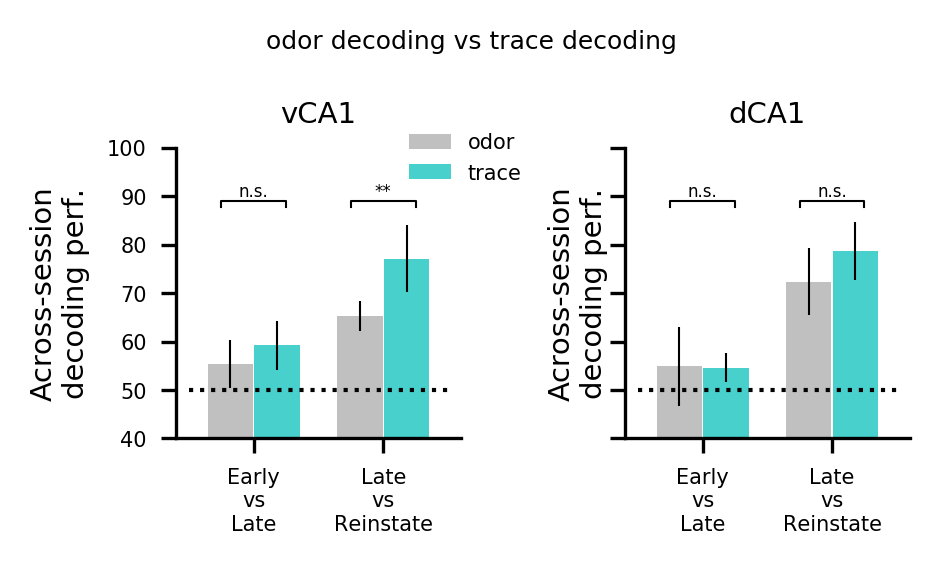

In [27]:
loops = 10
fig, ax = pl.subplots(1,2, figsize=(3.5, 2), sharey=True)
for i,comp in zip(range(2),['prepost','postrenew']):
    ax[0].bar(i-.18,np.mean(across_vhpc_scores_CS_gmin_1s[comp][:loops])*100, width=.35,yerr=np.std(across_vhpc_scores_CS_gmin_1s[comp][:loops])*100,
             color='silver')
    ax[0].bar(i+.18,across_vhpc_scores_tr_gmin_1s[comp][:loops].mean()*100, width=.35,yerr=np.std(across_vhpc_scores_tr_gmin_1s[comp][:loops])*100,
             color='mediumturquoise')
    ax[1].bar(i-.18,np.mean(across_dhpc_scores_CS_gmin_1s[comp][:loops])*100, width=.35,yerr=np.std(across_dhpc_scores_CS_gmin_1s[comp][:loops])*100,
             color='silver')
    ax[1].bar(i+.18,across_dhpc_scores_tr_gmin_1s[comp][:loops].mean()*100, width=.35,yerr=np.std(across_dhpc_scores_tr_gmin_1s[comp][:loops])*100,
             color='mediumturquoise')

for i in range(2):
    ax[i].set_xticks([0,1,2])
    ax[i].set_xticklabels(['Early\nvs\nLate','Late\nvs\nReinstate'])
    ax[i].set_ylim(40,100)
    ax[i].hlines(50, -0.5,1.5, color='k', lw=1, linestyles='dotted')
    ax[0].set_title("vCA1")
    ax[1].set_title("dCA1")

    
pvs=[]
compar = ['prepost','postrenew']
for i in range(2):
    pvs.append(add_significance(ax[0], across_vhpc_scores_CS_gmin_1s[compar[i]][:loops],
            across_vhpc_scores_tr_gmin_1s[compar[i]][:loops],i-.25,i+.25,89))
    pvs.append(add_significance(ax[1], across_dhpc_scores_CS_gmin_1s[compar[i]][:loops],
            across_dhpc_scores_tr_gmin_1s[compar[i]][:loops],i-.25,i+.25,89))

ax[0].set_ylabel("Across-session\ndecoding perf.")
ax[1].set_ylabel("Across-session\ndecoding perf.")
ax[0].legend([Patch(facecolor='silver'),Patch(facecolor='mediumturquoise')],['odor','trace'],loc=(.79,.85),frameon=False)
fig.suptitle("odor decoding vs trace decoding")
fig.tight_layout(pad=4)
fig.savefig('../final-ish figures/%s_Xsession_CSvsTr_VandD.jpg'%NOTEBOOK_NAME)

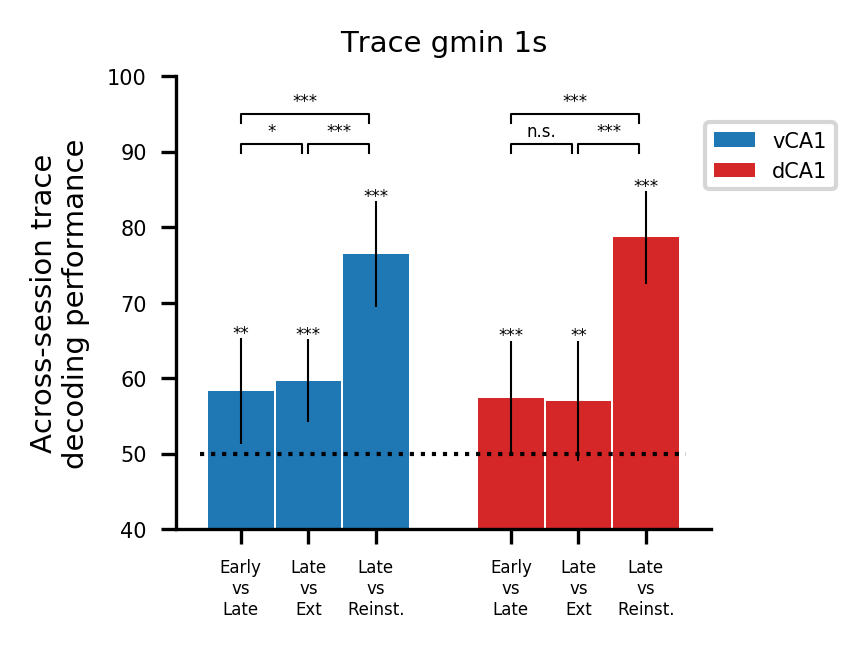

In [28]:
import random
from matplotlib.patches import Patch

loops = 15
fig, ax = pl.subplots(1,1, figsize=(2.3, 2), sharey=True)
for i,comp in zip(range(3),['prepost','postext2','postrenew']):
        ax.bar(i,np.mean(across_vhpc_scores_tr_gmin_1s[comp])*100, width=.97,yerr=np.std(across_vhpc_scores_tr_gmin_1s[comp])*100,
             color='tab:blue')
        ax.bar(i+4,np.mean(across_dhpc_scores_tr_gmin_1s[comp])*100, width=.97,yerr=np.std(across_dhpc_scores_tr_gmin_1s[comp])*100,
             color='tab:red')
ax.set_xticks([0,1,2,4,5,6])
ax.set_xticklabels(['Early\nvs\nLate','Late\nvs\nExt','Late\nvs\nReinst.','Early\nvs\nLate','Late\nvs\nExt','Late\nvs\nReinst.'],fontsize=4)
ax.set_ylim(40,100)
ax.set_title("Trace gmin 1s")
ax.hlines(50, -0.6,6.6, color='k', lw=1, linestyles='dotted')
ax.set_ylabel("Across-session trace\ndecoding performance")
ax.legend([Patch(facecolor='tab:blue'),Patch(facecolor='tab:red')],['vCA1','dCA1'],loc=(.99,.75),frameon=True)


pvs=[]
compar = ['prepost','postext2','postrenew']
for i in range(2):
    pvs.append(add_significance(ax, across_vhpc_scores_tr_gmin_1s[compar[i]][-loops:],
                across_vhpc_scores_tr_gmin_1s[compar[i+1]][-loops:],i,i+.9,91,mcc=2))
    pvs.append(add_significance(ax, across_dhpc_scores_tr_gmin_1s[compar[i]][-loops:],
                across_dhpc_scores_tr_gmin_1s[compar[i+1]][-loops:],i+4,i+4.9,91,mcc=2))
pvs.append(add_significance(ax, across_vhpc_scores_tr_gmin_1s[compar[0]][-loops:],
            across_vhpc_scores_tr_gmin_1s[compar[2]][-loops:],0,1.9,95,mcc=2))
pvs.append(add_significance(ax, across_dhpc_scores_tr_gmin_1s[compar[0]][-loops:],
            across_dhpc_scores_tr_gmin_1s[compar[2]][-loops:],4,5.9,95,mcc=2))


for comp,i in zip(compar, range(len(compar))):
    for r,reg in zip(range(2),['vhpc','dhpc']):
        pvs.append(sig_vs_chance(ax,eval("across_%s_scores_tr_gmin_1s[comp]"%(reg))[-loops:],.5,i+(4*r),
               np.mean(eval("across_%s_scores_tr_gmin_1s[comp]"%(reg)))*100+(np.std(eval("across_%s_scores_tr_gmin_1s[comp]"%(reg)))*100),
                        loops=loops,sig_func=None,colors='k'))

fig.savefig('../img/%s_Xsession_trace_decoding_VandD.jpg'%NOTEBOOK_NAME)

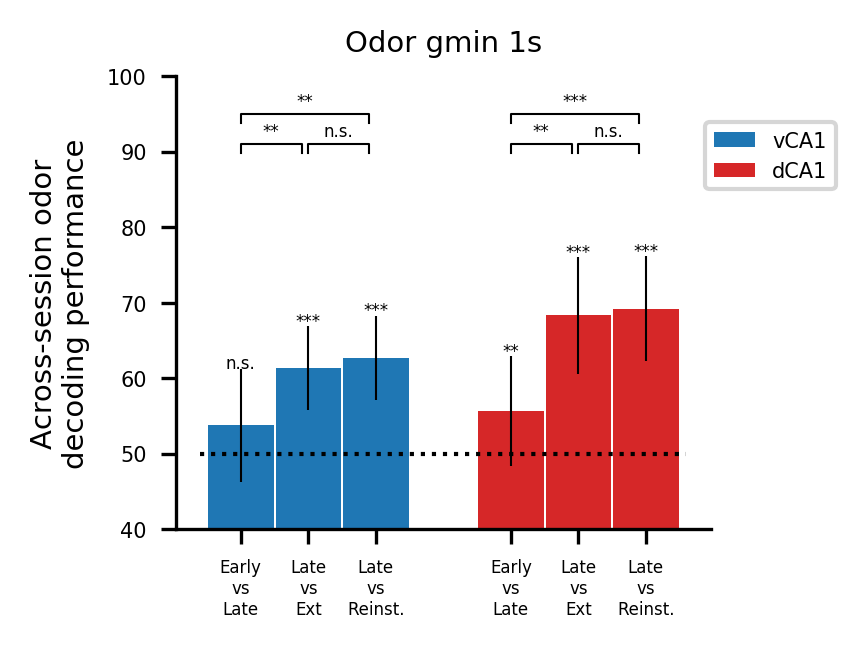

In [29]:
import random
from matplotlib.patches import Patch

loops = 15
fig, ax = pl.subplots(1,1, figsize=(2.3, 2), sharey=True)
for i,comp in zip(range(3),['prepost','postext2','postrenew']):
        ax.bar(i,np.mean(across_vhpc_scores_CS_gmin_1s[comp])*100, width=.97,yerr=np.std(across_vhpc_scores_CS_gmin_1s[comp])*100,
             color='tab:blue')
        ax.bar(i+4,np.mean(across_dhpc_scores_CS_gmin_1s[comp])*100, width=.97,yerr=np.std(across_dhpc_scores_CS_gmin_1s[comp])*100,
             color='tab:red')
ax.set_xticks([0,1,2,4,5,6])
ax.set_xticklabels(['Early\nvs\nLate','Late\nvs\nExt','Late\nvs\nReinst.','Early\nvs\nLate','Late\nvs\nExt','Late\nvs\nReinst.'],fontsize=4)
ax.set_ylim(40,100)
ax.set_title("Odor gmin 1s")
ax.hlines(50, -0.6,6.6, color='k', lw=1, linestyles='dotted')
ax.set_ylabel("Across-session odor\ndecoding performance")
ax.legend([Patch(facecolor='tab:blue'),Patch(facecolor='tab:red')],['vCA1','dCA1'],loc=(.99,.75),frameon=True)


pvs=[]
compar = ['prepost','postext2','postrenew']
for i in range(2):
    pvs.append(add_significance(ax, across_vhpc_scores_CS_gmin_1s[compar[i]][-loops:],
                across_vhpc_scores_CS_gmin_1s[compar[i+1]][-loops:],i,i+.9,91,mcc=2))
    pvs.append(add_significance(ax, across_dhpc_scores_CS_gmin_1s[compar[i]][-loops:],
                across_dhpc_scores_CS_gmin_1s[compar[i+1]][-loops:],i+4,i+4.9,91,mcc=2))
pvs.append(add_significance(ax, across_vhpc_scores_CS_gmin_1s[compar[0]][-loops:],
            across_vhpc_scores_CS_gmin_1s[compar[2]][-loops:],0,1.9,95,mcc=2))
pvs.append(add_significance(ax, across_dhpc_scores_CS_gmin_1s[compar[0]][-loops:],
            across_dhpc_scores_CS_gmin_1s[compar[2]][-loops:],4,5.9,95,mcc=2))


for comp,i in zip(compar, range(len(compar))):
    for r,reg in zip(range(2),['vhpc','dhpc']):
        pvs.append(sig_vs_chance(ax,eval("across_%s_scores_CS_gmin_1s[comp]"%(reg))[-loops:],.5,i+(4*r),
               np.mean(eval("across_%s_scores_CS_gmin_1s[comp]"%(reg)))*100+(np.std(eval("across_%s_scores_CS_gmin_1s[comp]"%(reg)))*100),
                        loops=loops,sig_func=None,colors='k'))

fig.savefig('../img/%s_Xsession_odor_decoding_VandD.jpg'%NOTEBOOK_NAME)

In [30]:
loops = 10

In [31]:
W_or_A = 'within','across'
region = '_vhpc','_dhpc'
epoch = '_CS','_tr'
cells = '','_gmin','_200'
time = '_1s',
for a in W_or_A:
    for b in region:
        for c in epoch:
            for d in cells:
                for e in time:
                    exec('%s%s%s%s%s_means = {}'%(a,b,c,d,e))
                    for sess in eval('%s_sessions'%a):
                        exec('%s%s%s%s%s_means[sess] = np.mean(%s%s_scores%s%s%s[sess][:loops])'%(a,b,c,d,e,a,b,c,d,e))

In [32]:
W_or_A = 'within','across'
region = '_vhpc','_dhpc'
epoch = '_CS','_tr'
time = '_1s',
for a in W_or_A:
    for b in region:
        for c in epoch:
                for e in time:
                    exec('%s%s%s_200%s_means = {}'%(a,b,c,e))
                    for sess in eval('%s_sessions'%a):
                        exec('%s%s%s_200%s_means[sess] = np.mean(%s%s_scores%s_200%s[sess][:loops])'%(a,b,c,e,a,b,c,e))

In [33]:
for b in region:
    for c in epoch:
        for d in cells:
            for e in time:
                exec('decoding%s%s%s%s_heatmap = np.zeros((6,6))'%(b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[0,0] = within%s%s%s%s_means["pre"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[1,1] = within%s%s%s%s_means["d2"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[2,2] = within%s%s%s%s_means["post"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[3,3] = within%s%s%s%s_means["ext1"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[4,4] = within%s%s%s%s_means["ext2"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[5,5] = within%s%s%s%s_means["renew"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[0,1] = across%s%s%s%s_means["pred2"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[1,0] = across%s%s%s%s_means["pred2"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[0,2] = across%s%s%s%s_means["prepost"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[2,0] = across%s%s%s%s_means["prepost"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[0,3] = across%s%s%s%s_means["preext1"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[3,0] = across%s%s%s%s_means["preext1"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[0,4] = across%s%s%s%s_means["preext2"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[4,0] = across%s%s%s%s_means["preext2"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[0,5] = across%s%s%s%s_means["prerenew"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[5,0] = across%s%s%s%s_means["prerenew"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[1,2] = across%s%s%s%s_means["d2post"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[2,1] = across%s%s%s%s_means["d2post"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[1,3] = across%s%s%s%s_means["d2ext1"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[3,1] = across%s%s%s%s_means["d2ext1"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[1,4] = across%s%s%s%s_means["d2ext2"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[4,1] = across%s%s%s%s_means["d2ext2"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[1,5] = across%s%s%s%s_means["d2renew"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[5,1] = across%s%s%s%s_means["d2renew"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[2,3] = across%s%s%s%s_means["postext1"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[3,2] = across%s%s%s%s_means["postext1"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[2,4] = across%s%s%s%s_means["postext2"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[4,2] = across%s%s%s%s_means["postext2"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[2,5] = across%s%s%s%s_means["postrenew"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[5,2] = across%s%s%s%s_means["postrenew"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[3,4] = across%s%s%s%s_means["ext1ext2"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[4,3] = across%s%s%s%s_means["ext1ext2"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[3,5] = across%s%s%s%s_means["ext1renew"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[5,3] = across%s%s%s%s_means["ext1renew"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[4,5] = across%s%s%s%s_means["ext2renew"]'%(b,c,d,e,b,c,d,e))
                exec('decoding%s%s%s%s_heatmap[5,4] = across%s%s%s%s_means["ext2renew"]'%(b,c,d,e,b,c,d,e))

In [34]:
heatmaps = []
for b in region:
    for c in epoch:
        for d in cells:
            for e in time:
                exec('heatmaps.append("decoding%s%s%s%s_heatmap")'%(b,c,d,e))


In [35]:
heatmaps

['decoding_vhpc_CS_1s_heatmap',
 'decoding_vhpc_CS_gmin_1s_heatmap',
 'decoding_vhpc_CS_200_1s_heatmap',
 'decoding_vhpc_tr_1s_heatmap',
 'decoding_vhpc_tr_gmin_1s_heatmap',
 'decoding_vhpc_tr_200_1s_heatmap',
 'decoding_dhpc_CS_1s_heatmap',
 'decoding_dhpc_CS_gmin_1s_heatmap',
 'decoding_dhpc_CS_200_1s_heatmap',
 'decoding_dhpc_tr_1s_heatmap',
 'decoding_dhpc_tr_gmin_1s_heatmap',
 'decoding_dhpc_tr_200_1s_heatmap']

heatmaps_b = []
heatmaps_b.append(heatmaps[0])
heatmaps_b.append(heatmaps[1])
heatmaps_b.append(heatmaps[4])
heatmaps_b.append(heatmaps[5])
heatmaps_b.append(heatmaps[8])
heatmaps_b.append(heatmaps[9])
heatmaps_b.append(heatmaps[12])
heatmaps_b.append(heatmaps[13])
heatmaps_b.append(heatmaps[2])
heatmaps_b.append(heatmaps[3])
heatmaps_b.append(heatmaps[6])
heatmaps_b.append(heatmaps[7])
heatmaps_b.append(heatmaps[10])
heatmaps_b.append(heatmaps[11])
heatmaps_b.append(heatmaps[14])
heatmaps_b.append(heatmaps[15])
print heatmaps_b

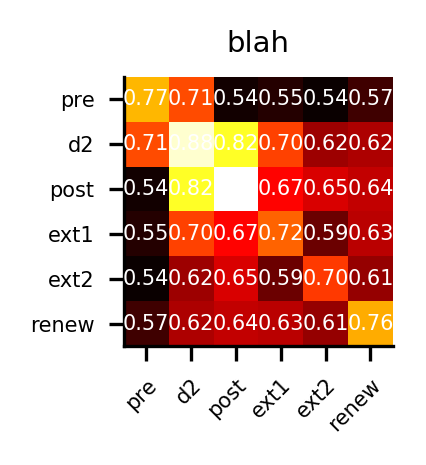

In [36]:
fig, ax = pl.subplots()
im = ax.imshow(decoding_vhpc_CS_1s_heatmap, cmap='hot', interpolation='nearest')

sessions = 'pre','d2','post','ext1','ext2','renew'
# We want to show all ticks...
ax.set_xticks(np.arange(len(sessions)))
ax.set_yticks(np.arange(len(sessions)))
# ... and label them with the respective list entries
ax.set_xticklabels(sessions)
ax.set_yticklabels(sessions)

# Rotate the tick labels and set their alignment.
pl.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(6):
    for j in range(6):
        text = ax.text(j, i, '%.2f'%decoding_vhpc_CS_1s_heatmap [i, j],
                       ha="center", va="center", color="w")

ax.set_title("blah")
fig.tight_layout()
pl.show()


In [11]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["white", "black"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

In [13]:
import matplotlib

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = pl.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    #cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    #cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels, fontsize=7)
    ax.set_yticklabels(row_labels, fontsize=7)

    # Let the horizontal axes labeling appear on top.
    #ax.tick_params(top=True, bottom=False,
    #               labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    pl.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Turn spines off and create white grid.
    #for edge, spine in ax.spines.items():
    #    spine.set_visible(False)

    #ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    #ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    #ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
    #ax.tick_params(which="minor", bottom=False, left=False)

    return im#, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["white", "black"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

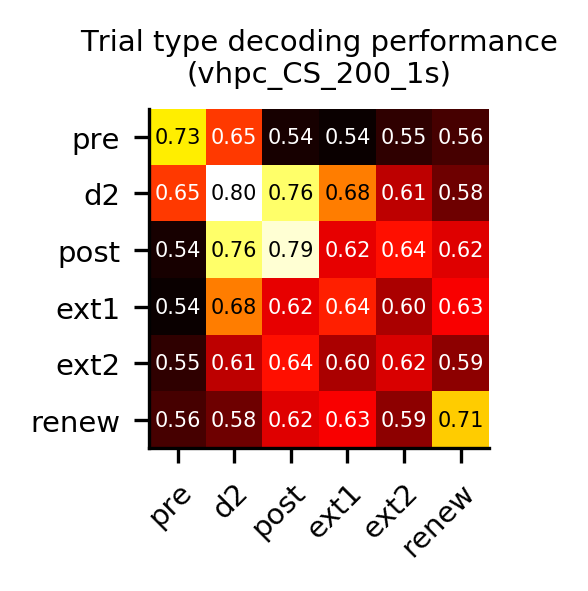

In [25]:
to_plot = heatmaps[2]
sessions = 'pre','d2','post','ext1','ext2','renew'

fig, ax = pl.subplots()

im = heatmap(eval(to_plot), sessions, sessions, ax=ax, cmap="hot")
texts = annotate_heatmap(im, valfmt="{x:.2f}")

#fig.tight_layout()
ax.set_title('Trial type decoding performance\n(' +to_plot[9:-8] +')')
pl.show()

# plot 'em all

fig, ((ax0, ax1,ax2), (ax3, ax4,ax5), (ax6, ax7,ax8), (ax9, ax10,ax11)) = pl.subplots(4, 3, figsize=(6, 8.5))

for i in range(12):
    im = heatmap(eval(heatmaps[i]),sessions, sessions, ax=eval('ax%s'%i),cmap="coolwarm",vmin=0.5, vmax=1)
    annotate_heatmap(im, valfmt="{x:.2f}", size=7)
    eval('ax%s'%i).set_title(heatmaps[i][9:-8])

pl.tight_layout()
pl.show()
fig.savefig('../img/%s_ALL.jpg'%NOTEBOOK_NAME)

In [26]:
import matplotlib

def vector_heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", cbarticklabels=None,c_bar=False, **kwargs):

    if not ax:
        ax = pl.gca()

    # Plot the heatmap
    im = ax.pcolormesh(data, **kwargs)

    # Create colorbar
    if c_bar == True:
        cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
        if cbarticklabels is not None:
            cbar.ax.set_yticklabels(cbarticklabels)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1])+.5)
    ax.set_yticks(np.arange(data.shape[0])+.5)
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels, fontsize=7)
    ax.set_yticklabels(row_labels, fontsize=7)

    # Let the horizontal axes labeling appear on top.
    #ax.tick_params(top=True, bottom=False,
    #               labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    pl.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Turn spines off and create white grid.
    #for edge, spine in ax.spines.items():
    #    spine.set_visible(False)

    #ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    #ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    #ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
    ax.tick_params(which="both", bottom=False, left=False)

    return im#, cbar

In [27]:
def annotate_vector_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["white", "black"],
                     threshold=None, stars=False, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array().reshape(im._meshWidth,im._meshHeight)
        

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            if stars == True:
                if data[i,j] > 1.3 and data[i,j] < 2:
                    text = im.axes.text(j+.5, i+.5, valfmt('*', None), **kw)
                if data[i,j] < -1.3 and data[i,j] > -2:
                    text = im.axes.text(j+.5, i+.5, valfmt('*', None), **kw)
            else:
                text = im.axes.text(j+.5, i+.5, valfmt(data[i, j], None), **kw)
            texts.append(text)

In [42]:
session_labels = 'Early','Day2','Late','Ext1','Ext2','Reinstate'

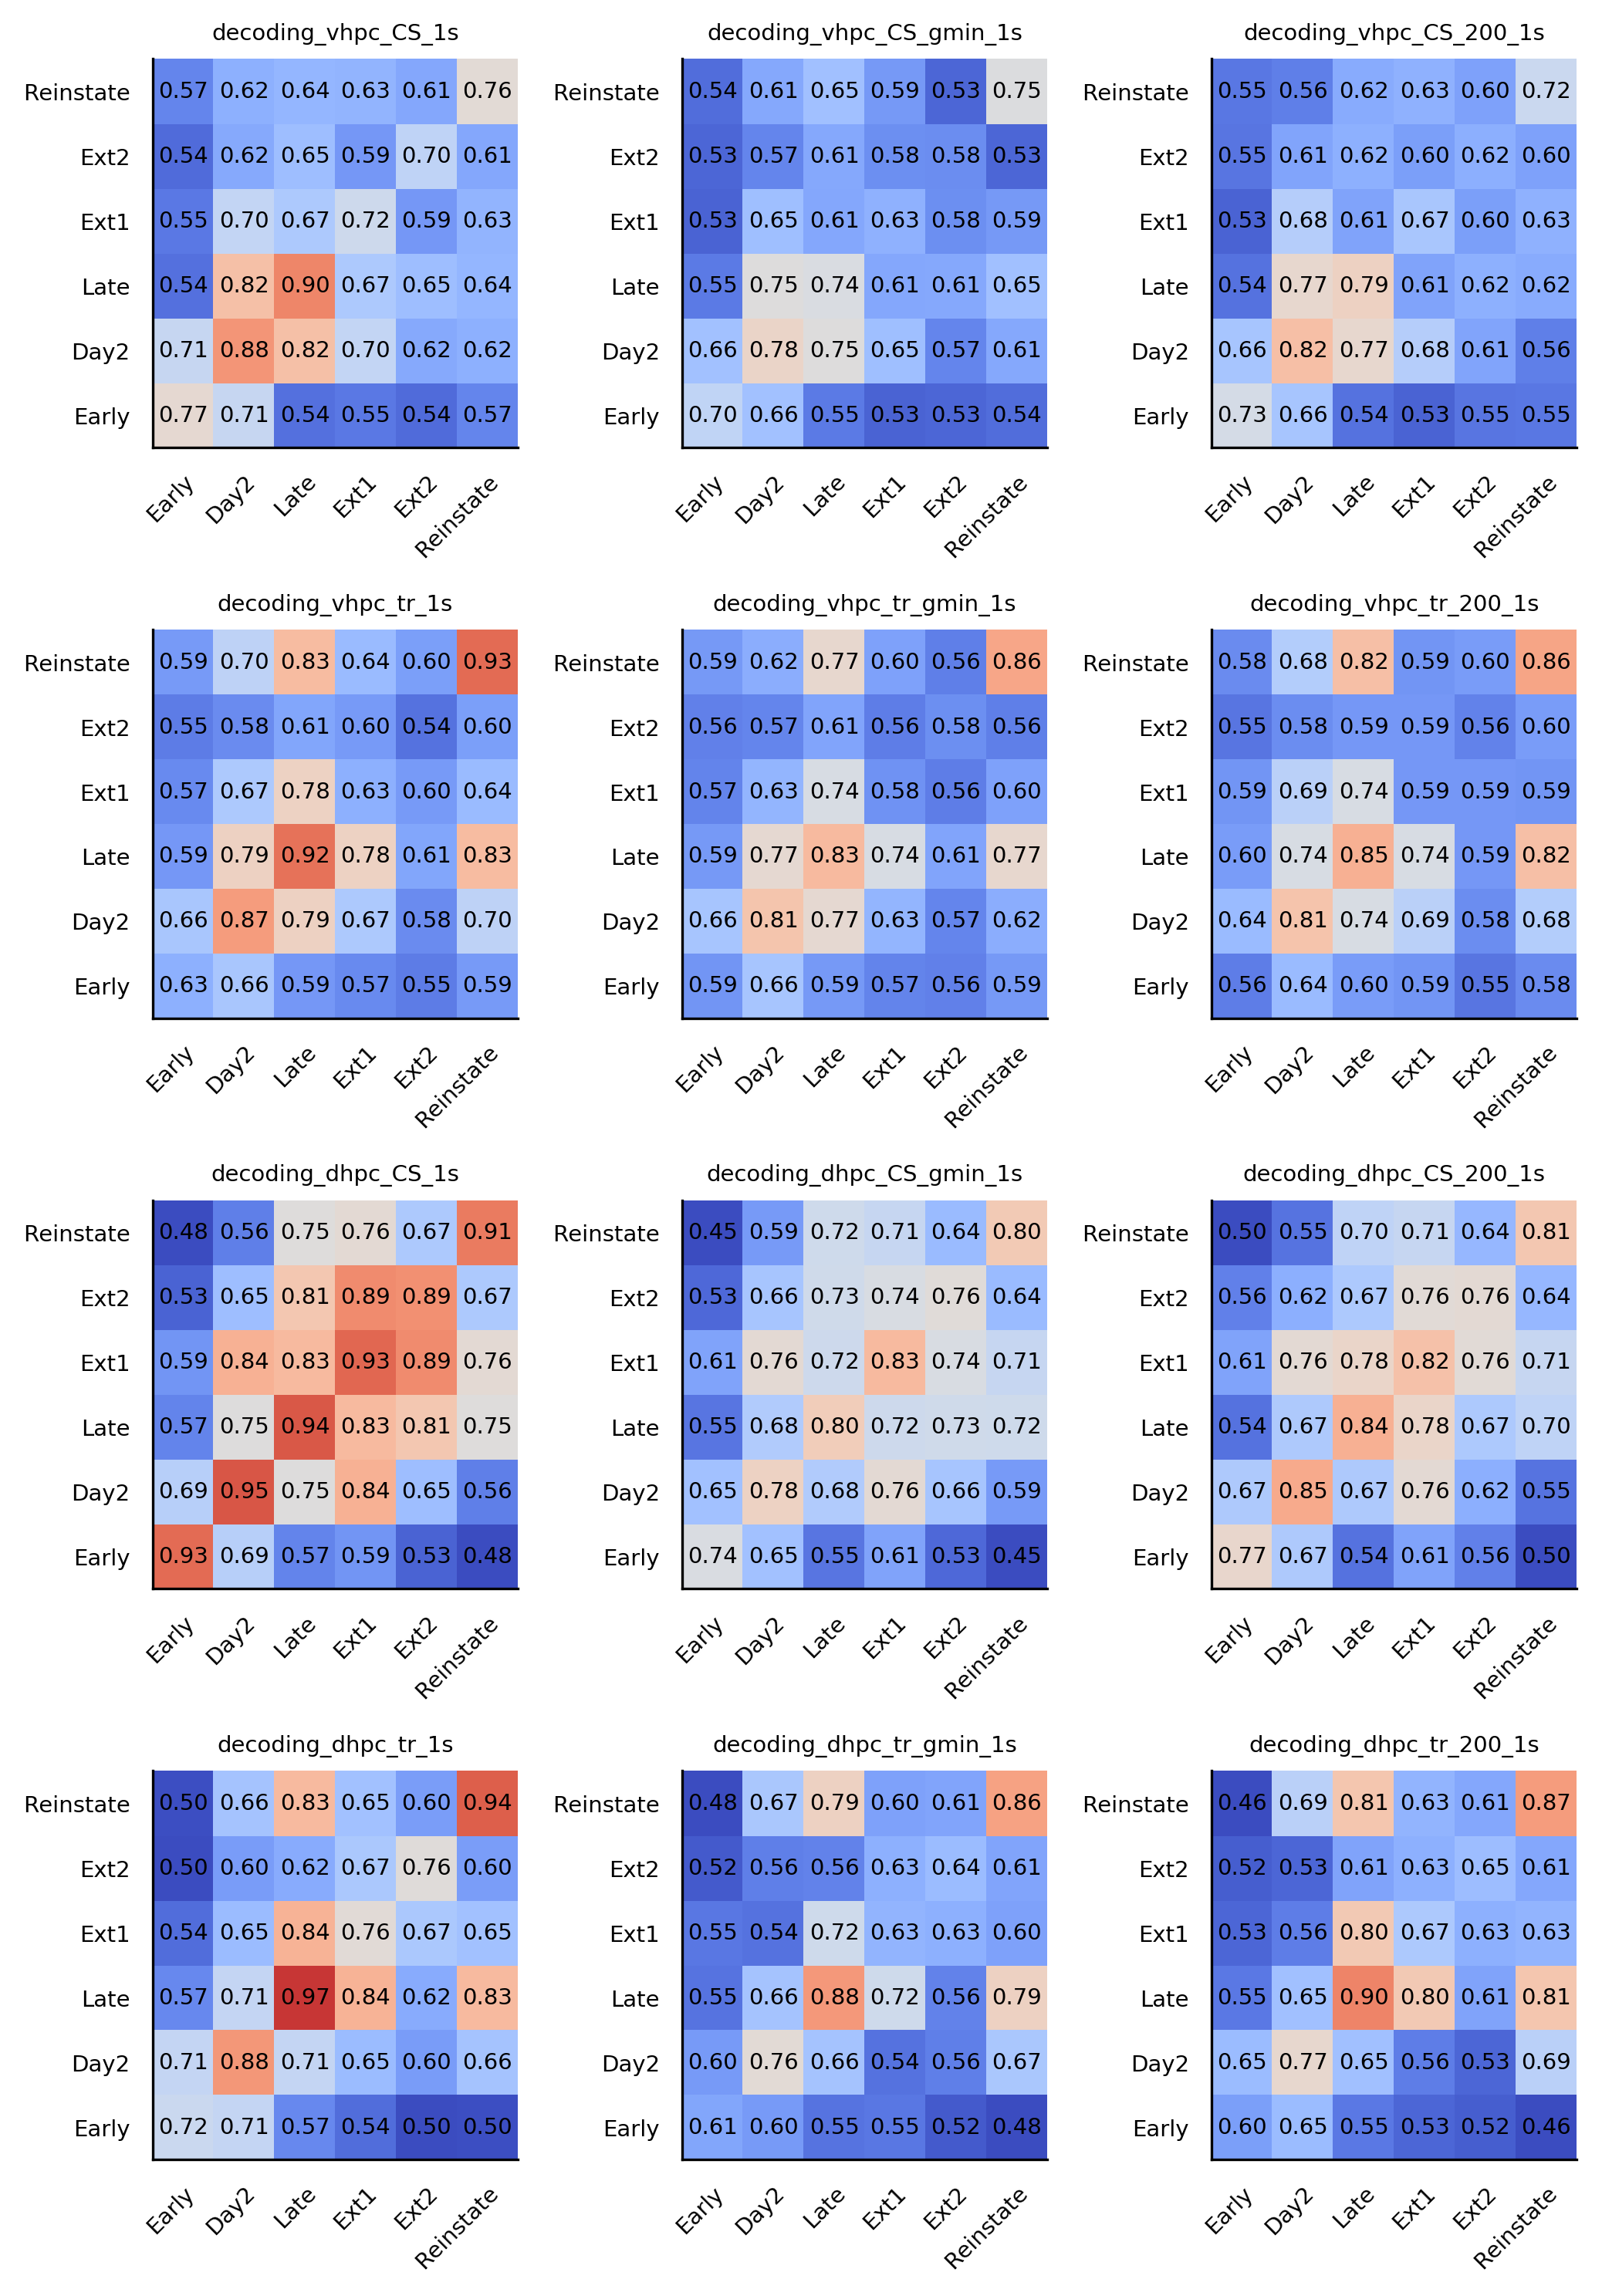

In [43]:
# plot 'em all

fig, ((ax0, ax1,ax2), (ax3, ax4,ax5), (ax6, ax7,ax8), (ax9, ax10,ax11)) = pl.subplots(4, 3, figsize=(7, 10))
for i in range(12):
    im = vector_heatmap(eval(heatmaps[i]),session_labels, session_labels, ax=eval('ax%s'%i),cmap="coolwarm",vmin=0.5,vmax=1)
    annotate_vector_heatmap(im, valfmt="{x:.2f}", size=7,threshold=.4)
    eval('ax%s'%i).set_title(heatmaps[i][:-8])

pl.tight_layout(pad=2)
pl.show()
#fig.savefig('../img/%s_cells.jpg'%NOTEBOOK_NAME)

# compare dhpc vs vhpc decoding accuracies

In [44]:
loops=10
W_or_A = 'within','across'
epoch = '_CS','_tr'
cells = '','_gmin','_200'
time = '_1s',
for a in W_or_A:
        for c in epoch:
            for d in cells:
                for e in time:
                    exec('%s%s%s%s_MannWhitney = {}'%(a,c,d,e))
                    for sess in eval('%s_sessions'%a):
                        exec('%s%s%s%s_MannWhitney[sess] = sstats.mannwhitneyu(%s_vhpc_scores%s%s%s[sess][:loops],\
                        %s_dhpc_scores%s%s%s[sess][:loops])[-1]'%(a,c,d,e,a,c,d,e,a,c,d,e)) #only take pvalue

In [45]:
import copy
W_or_A = 'within','across'
epoch = '_CS','_tr'
cells = '','_gmin','_200'
time = '_1s',
for a in W_or_A:
        for c in epoch:
            for d in cells:
                for e in time:
                    exec("%s%s%s%s_MannWhitney_to_plot = copy.deepcopy(%s%s%s%s_MannWhitney)"%(a,c,d,e,a,c,d,e))

In [46]:
import math
W_or_A = 'within','across'
epoch = '_CS','_tr'
cells = '','_gmin','_200'
time = '_1s',
for a in W_or_A:
        for c in epoch:
            for d in cells:
                for e in time:
                    for sess in eval("%s%s%s%s_MannWhitney"%(a,c,d,e)):
                        exec("%s%s%s%s_MannWhitney_to_plot[sess] = 0"%(a,c,d,e))
                        if eval("%s_vhpc%s%s%s_means[sess]"%(a,c,d,e)) > eval("%s_dhpc%s%s%s_means[sess]"%(a,c,
                                d,e)) and eval("%s%s%s%s_MannWhitney[sess]"%(a,c,d,e))< 0.05:
                             exec("%s%s%s%s_MannWhitney_to_plot[sess] = math.log10(%s%s%s%s_MannWhitney[sess])"%(a,c,d,e,a,c,d,e))
                        if eval("%s_vhpc%s%s%s_means[sess]"%(a,c,d,e)) < eval("%s_dhpc%s%s%s_means[sess]"%(a,c,
                                d,e)) and eval("%s%s%s%s_MannWhitney[sess]"%(a,c,d,e))< 0.05:
                             exec("%s%s%s%s_MannWhitney_to_plot[sess] = -(math.log10(%s%s%s%s_MannWhitney[sess]))"%(a,c,d,e,a,c,d,e))

In [47]:
for b in region:
    for d in '_200','_gmin':
        for c in epoch:
            for e in time:
                exec('MannWhitney%s%s%s_heatmap = np.zeros((6,6))'%(c,d,e))
                exec('MannWhitney%s%s%s_heatmap[0,0] = within%s%s%s_MannWhitney_to_plot["pre"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[1,1] = within%s%s%s_MannWhitney_to_plot["d2"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[2,2] = within%s%s%s_MannWhitney_to_plot["post"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[3,3] = within%s%s%s_MannWhitney_to_plot["ext1"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[4,4] = within%s%s%s_MannWhitney_to_plot["ext2"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[5,5] = within%s%s%s_MannWhitney_to_plot["renew"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[0,1] = across%s%s%s_MannWhitney_to_plot["pred2"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[1,0] = across%s%s%s_MannWhitney_to_plot["pred2"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[0,2] = across%s%s%s_MannWhitney_to_plot["prepost"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[2,0] = across%s%s%s_MannWhitney_to_plot["prepost"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[0,3] = across%s%s%s_MannWhitney_to_plot["preext1"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[3,0] = across%s%s%s_MannWhitney_to_plot["preext1"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[0,4] = across%s%s%s_MannWhitney_to_plot["preext2"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[4,0] = across%s%s%s_MannWhitney_to_plot["preext2"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[0,5] = across%s%s%s_MannWhitney_to_plot["prerenew"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[5,0] = across%s%s%s_MannWhitney_to_plot["prerenew"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[1,2] = across%s%s%s_MannWhitney_to_plot["d2post"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[2,1] = across%s%s%s_MannWhitney_to_plot["d2post"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[1,3] = across%s%s%s_MannWhitney_to_plot["d2ext1"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[3,1] = across%s%s%s_MannWhitney_to_plot["d2ext1"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[1,4] = across%s%s%s_MannWhitney_to_plot["d2ext2"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[4,1] = across%s%s%s_MannWhitney_to_plot["d2ext2"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[1,5] = across%s%s%s_MannWhitney_to_plot["d2renew"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[5,1] = across%s%s%s_MannWhitney_to_plot["d2renew"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[2,3] = across%s%s%s_MannWhitney_to_plot["postext1"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[3,2] = across%s%s%s_MannWhitney_to_plot["postext1"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[2,4] = across%s%s%s_MannWhitney_to_plot["postext2"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[4,2] = across%s%s%s_MannWhitney_to_plot["postext2"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[2,5] = across%s%s%s_MannWhitney_to_plot["postrenew"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[5,2] = across%s%s%s_MannWhitney_to_plot["postrenew"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[3,4] = across%s%s%s_MannWhitney_to_plot["ext1ext2"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[4,3] = across%s%s%s_MannWhitney_to_plot["ext1ext2"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[3,5] = across%s%s%s_MannWhitney_to_plot["ext1renew"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[5,3] = across%s%s%s_MannWhitney_to_plot["ext1renew"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[4,5] = across%s%s%s_MannWhitney_to_plot["ext2renew"]'%(c,d,e,c,d,e))
                exec('MannWhitney%s%s%s_heatmap[5,4] = across%s%s%s_MannWhitney_to_plot["ext2renew"]'%(c,d,e,c,d,e))

In [48]:
MannWhitney_200_heatmap = []
for c in epoch:
    for e in time:
        exec('MannWhitney_200_heatmap.append("MannWhitney%s_200%s_heatmap")'%(c,e))

MannWhitney_gmin_heatmap = []
for c in epoch:
    for e in time:
        exec('MannWhitney_gmin_heatmap.append("MannWhitney%s_gmin%s_heatmap")'%(c,e))

In [28]:
def annotate_vector_heatmap2(im, data=None, valfmt="{x:.2f}",
                     textcolors=["white", "black"],
                     threshold=None, stars=False, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array().reshape(im._meshWidth,im._meshHeight)
        

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            if stars == True:
                if data[i,j] > 1.3 and data[i,j] < 2:
                    text = im.axes.text(j+.5, i+.5, '*', **kw)
                elif data[i,j] < -1.3 and data[i,j] > -2:
                    text = im.axes.text(j+.5, i+.5, '*', **kw)
                elif data[i,j] > 2 and data[i,j] < 3:
                    text = im.axes.text(j+.5, i+.5, '**', **kw)
                elif data[i,j] < -2 and data[i,j] > -3:
                    text = im.axes.text(j+.5, i+.5, '**', **kw)
                elif data[i,j] > 3:
                    text = im.axes.text(j+.5, i+.5, '***', **kw)
                elif data[i,j] < -3:
                    text = im.axes.text(j+.5, i+.5, '***', **kw)
                else:
                    kw.update(color=textcolors[int(im.norm(data[i, j]) > -1.4)])
                    text = im.axes.text(j+.5, i+.5, "n.s.",**kw)
            texts.append(text)

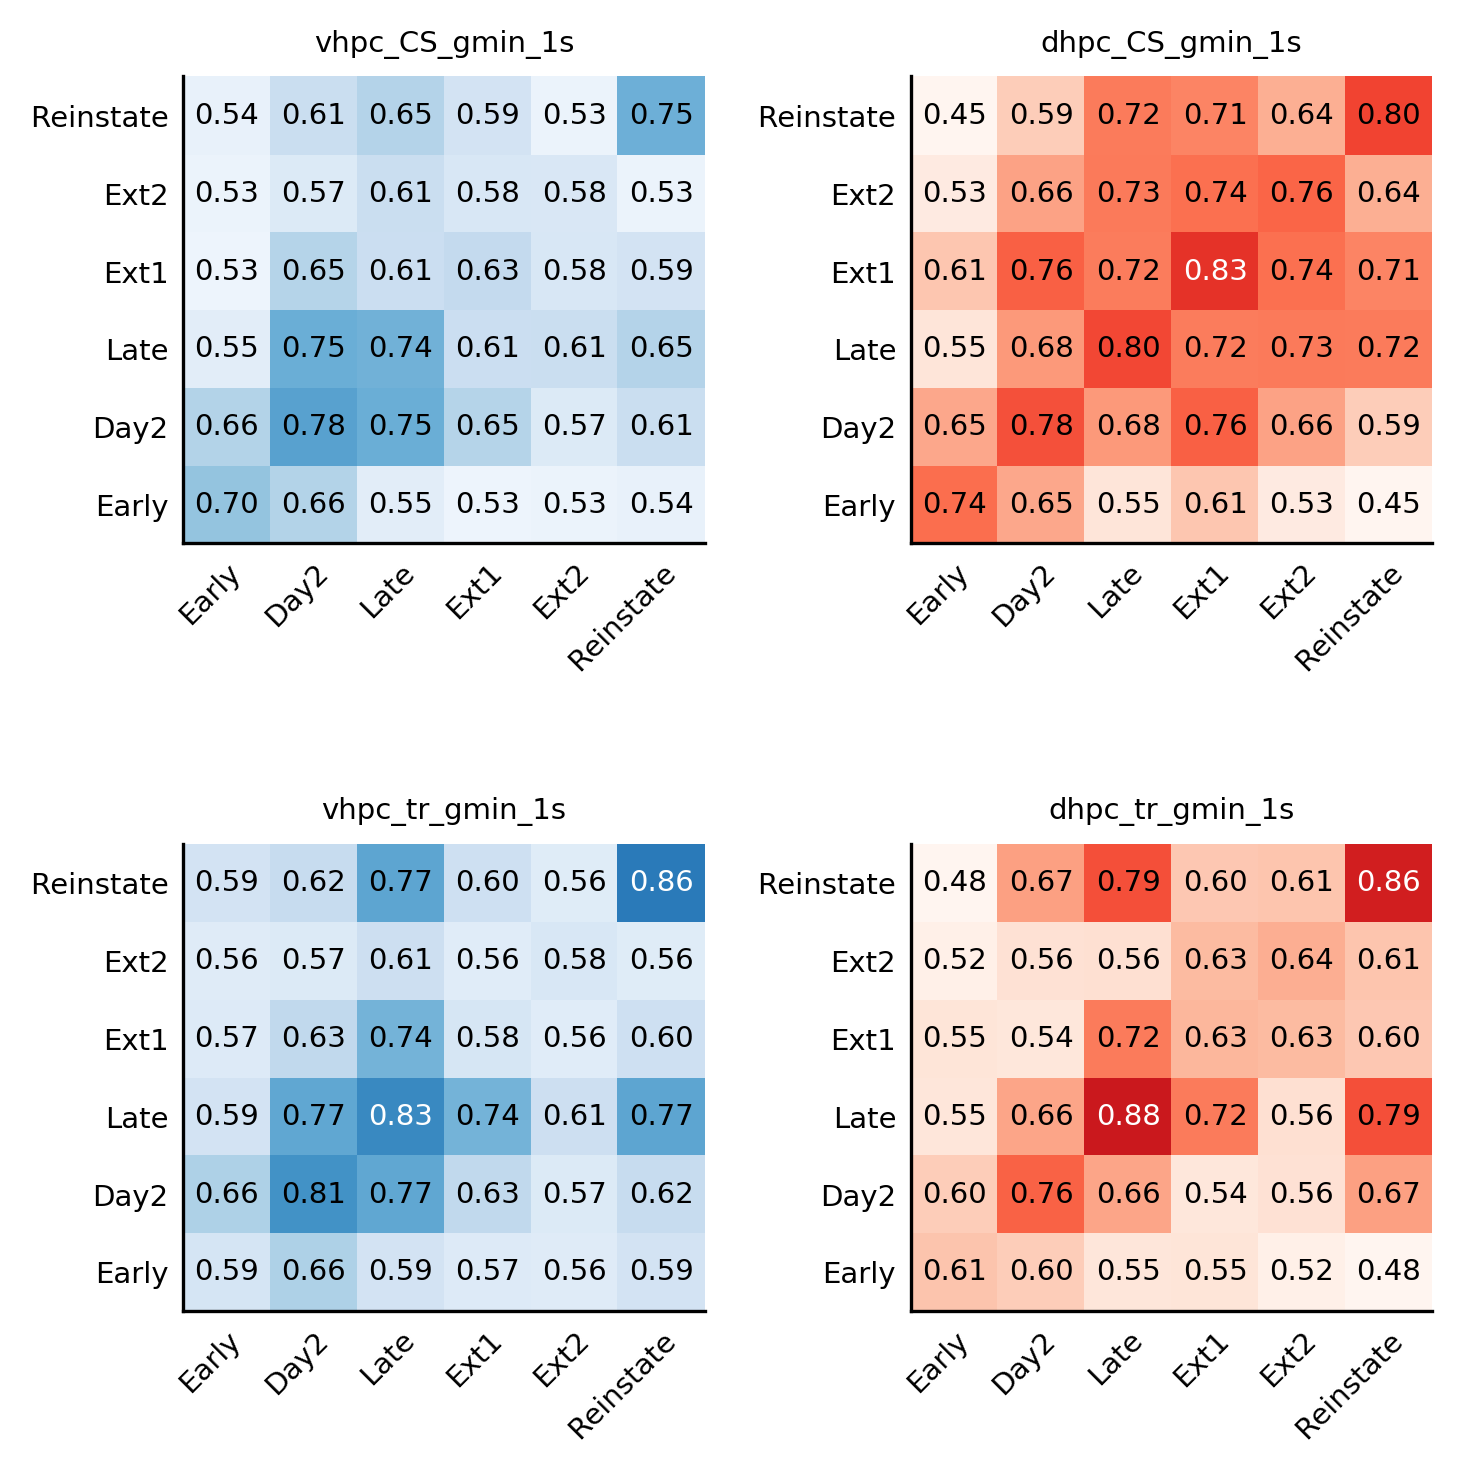

In [55]:
# plot 'em all

fig, ((ax1, ax7), (ax4, ax10)) = pl.subplots(2, 2, figsize=(5, 5))

for i in (1,7,4,10):
    if i == 1 or i == 4:
        cmaap = "Blues"
    else:
        cmaap = "Reds"
    im = vector_heatmap(eval(heatmaps[i]),session_labels, session_labels, ax=eval('ax%s'%i),cmap=cmaap,vmin=0.5,vmax=1)
    annotate_vector_heatmap(im, valfmt="{x:.2f}", size=7,textcolors=['k','w'],threshold=0.82)
    eval('ax%s'%i).set_title(heatmaps[i][9:-8])
    eval('ax%s'%i).tick_params(axis='both',length=0)
    #eval('ax%s'%i).set_xlabel('Tested on',fontsize=9)
    #eval('ax%s'%i).set_ylabel('Trained on',fontsize=9)

pl.tight_layout(h_pad=3)
pl.show()
fig.savefig('../final-ish figures/%s.pdf'%NOTEBOOK_NAME)

In [39]:
print eval(heatmaps[1])
print eval(heatmaps[2])

[[ 0.68733333  0.66866667  0.54933333  0.52866667  0.52933333  0.53866667]
 [ 0.66866667  0.77966667  0.75066667  0.63766667  0.591       0.59633333]
 [ 0.54933333  0.75066667  0.74666667  0.609       0.617       0.66733333]
 [ 0.52866667  0.63766667  0.609       0.63733333  0.58433333  0.59566667]
 [ 0.52933333  0.591       0.617       0.58433333  0.57933333  0.551     ]
 [ 0.53866667  0.59633333  0.66733333  0.59566667  0.551       0.75      ]]
[[ 0.72533333  0.65466667  0.54133333  0.53566667  0.551       0.56      ]
 [ 0.65466667  0.799       0.75933333  0.681       0.606       0.57533333]
 [ 0.54133333  0.75933333  0.78666667  0.62233333  0.63766667  0.62      ]
 [ 0.53566667  0.681       0.62233333  0.644       0.59866667  0.63      ]
 [ 0.551       0.606       0.63766667  0.59866667  0.617       0.58733333]
 [ 0.56        0.57533333  0.62        0.63        0.58733333  0.71233333]]


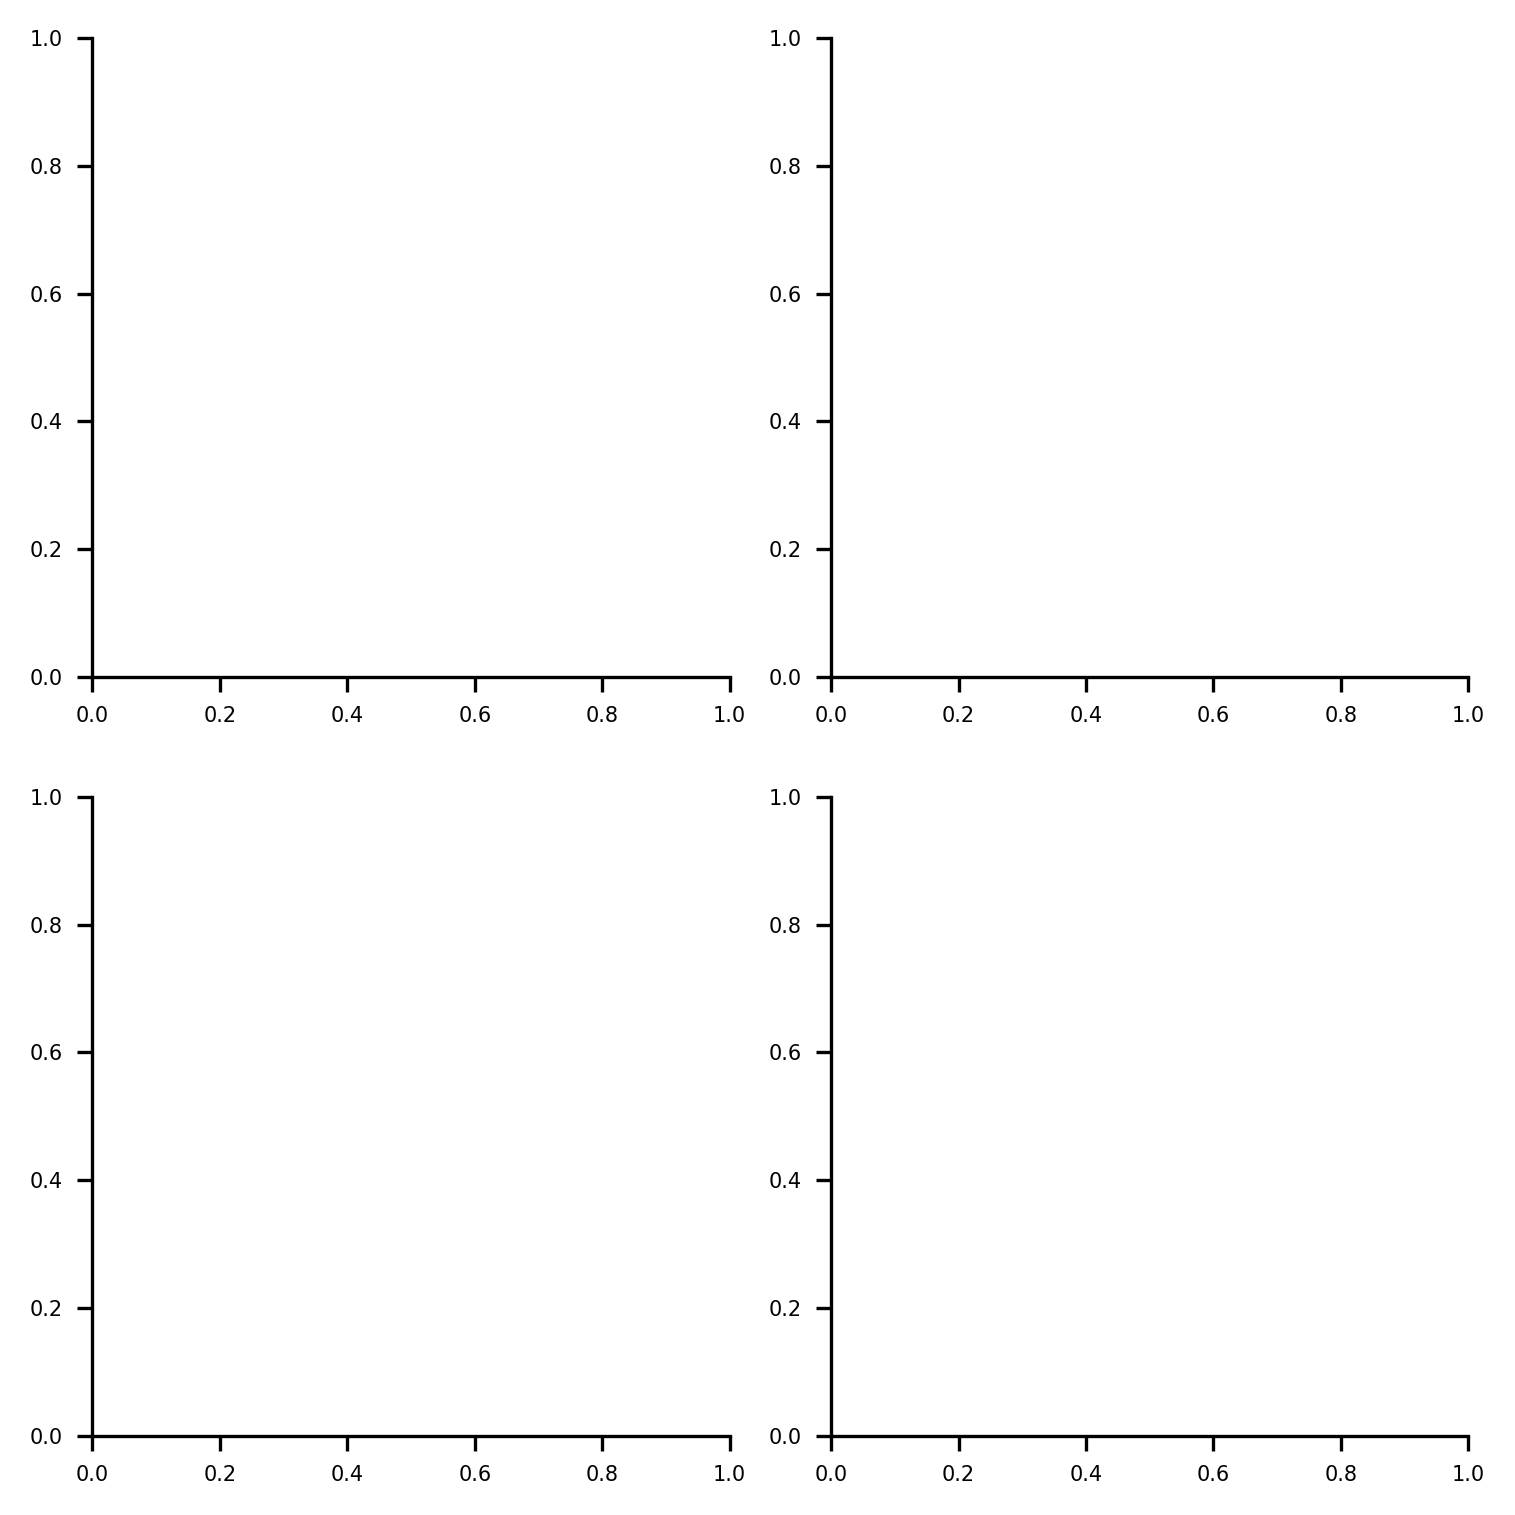

In [35]:
# plot 'em all

fig, ((ax1, ax7), (ax4, ax10)) = pl.subplots(2, 2, figsize=(5, 5))

for i in (2,8,5,11):
    if i == 2 or i == 5:
        cmaap = "Blues"
    else:
        cmaap = "Reds"
    im = vector_heatmap(eval(heatmaps[i]),session_labels, session_labels, ax=eval('ax%s'%i),cmap=cmaap,vmin=0.5,vmax=1)
    annotate_vector_heatmap(im, valfmt="{x:.2f}", size=7,textcolors=['k','w'],threshold=0.82)
    eval('ax%s'%i).set_title(heatmaps[i][9:-8])
    eval('ax%s'%i).tick_params(axis='both',length=0)
    #eval('ax%s'%i).set_xlabel('Tested on',fontsize=9)
    #eval('ax%s'%i).set_ylabel('Trained on',fontsize=9)

pl.tight_layout(h_pad=3)
pl.show()
fig.savefig('../final-ish figures/%s_200cells.pdf'%NOTEBOOK_NAME)

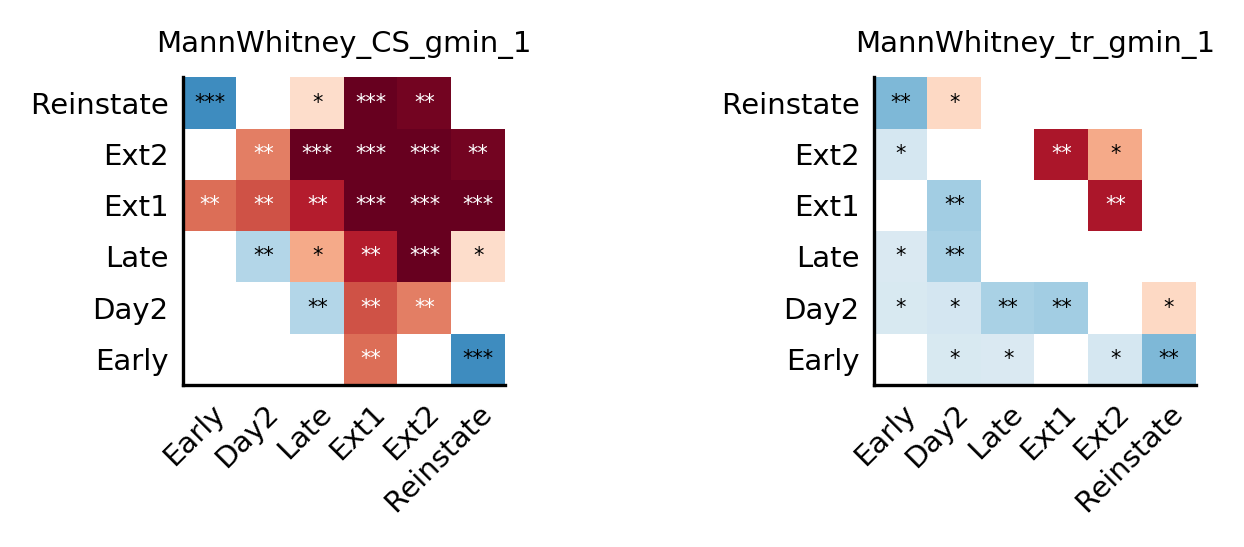

In [65]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#make unique colormap for emphasizing significant p-values
sigsv = cm.get_cmap('RdBu')
sigsd = cm.get_cmap('RdBu_r')
white = np.array([1, 1, 1, 1])
newcolors = np.vstack((sigsv(np.linspace(1, .5, 220)),
                       sigsv(np.linspace(1, -.5, 320))))
#pink = np.array([.96, .09, .6, 1])
newcolors[205:340, :] = white

newcmap = ListedColormap(newcolors)

fig, (ax0,ax1 ) = pl.subplots(1, 2, figsize=(5.3, 3))
cb_kw={}
cb_kw['ticks']=(-5,-3,-2,-1.3,0,1.3,2,3,5)

vmin=-5
vmax=5
for i in [0,1]:
    im = vector_heatmap(eval(MannWhitney_gmin_heatmap[i]),session_labels, session_labels, ax=eval('ax%s'%i),cmap=newcmap,
                        vmin=vmin,vmax=vmax,cbarlabel='p-value (log scale)',cbar_kw=cb_kw,cbarticklabels=['< vCA1',
                                        '0.001','0.01','0.05','non sig.','0.05','0.01','0.001', '< dCA1'])
    annotate_vector_heatmap2(im, valfmt="{x:.2f}", size=5,textcolors=['k','w'],threshold=2,stars=True)
    eval('ax%s'%i).set_title(MannWhitney_gmin_heatmap[i][:21])
    eval('ax%s'%i).tick_params(axis='both',length=0)

pl.tight_layout(pad=5)
pl.show()
fig.savefig('../img/%s_gmin_MannWhitney.pdf'%NOTEBOOK_NAME)

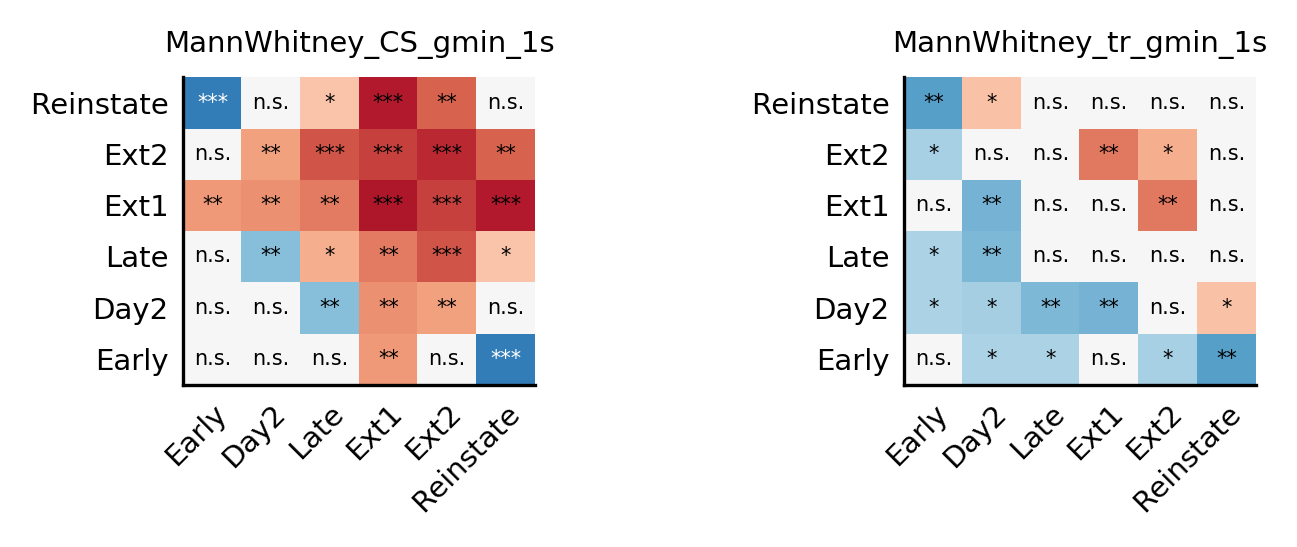

In [60]:
fig, (ax0,ax1 ) = pl.subplots(1, 2, figsize=(5.5, 3))
cb_kw={}
cb_kw['ticks']=(-5,-3,-2,-1.3,0,1.3,2,3,5)

vmin=-5
vmax=5
for i in range(2):
    im = vector_heatmap(eval(MannWhitney_gmin_heatmap[i]),session_labels, session_labels, ax=eval('ax%s'%i),cmap='RdBu_r',
                        vmin=vmin,vmax=vmax,cbarlabel='p-value (log scale)',cbar_kw=cb_kw,cbarticklabels=['< vCA1',
                                        '0.001','0.01','0.05','non sig.','0.05','0.01','0.001', '< dCA1'])
    annotate_vector_heatmap2(im, valfmt="{x:.2f}", size=5,textcolors=['w','k'],threshold=-3,stars=True)
    eval('ax%s'%i).set_title(MannWhitney_gmin_heatmap[i][:22])
    eval('ax%s'%i).tick_params(axis='both',length=0)

pl.tight_layout(pad=5)
pl.show()
fig.savefig('../final-ish figures/%s_gmin_dVSv_MannWhitney_matrix.pdf'%NOTEBOOK_NAME)

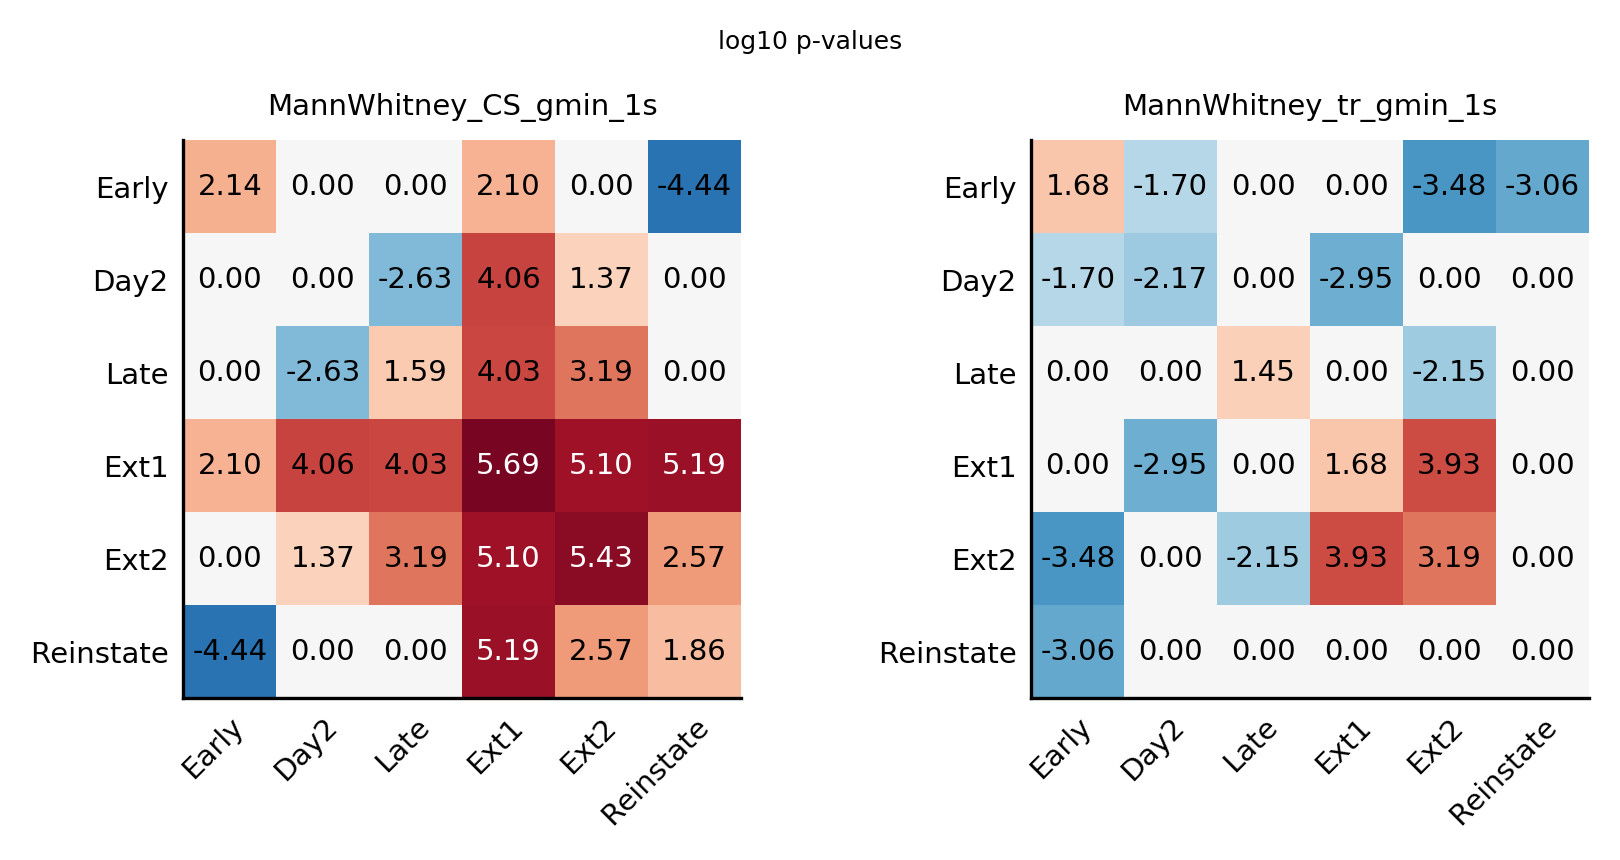

In [18]:
# plot 'em all

fig, (ax0,ax1 ) = pl.subplots(1, 2, figsize=(6, 3))
vmin=-6
vmax=6
for i in (0,1):
    im = heatmap(eval(MannWhitney_gmin_heatmap[i]),session_labels, session_labels, ax=eval('ax%s'%i),cmap="RdBu_r",vmin=vmin,vmax=vmax)
    annotate_heatmap(im, valfmt="{x:.2f}", size=7,textcolors=['k','w'],threshold=4.5)
    eval('ax%s'%i).set_title(MannWhitney_gmin_heatmap[i][:22])
    eval('ax%s'%i).tick_params(axis='both',length=0)
pl.suptitle('log10 p-values')
pl.tight_layout(pad=5)
pl.show()
fig.savefig('../img/%s_gmin_MannWhitney.jpg'%NOTEBOOK_NAME)

In [41]:
save_workspace(db)

Could not store variable 'random'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'matplotlib'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'cm'. Skipping...
Could not store variable 'math'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'copy'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
